In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))


from simulation import (params_base, state_base, compute_starting_total_length, check_d_probability, post_processing_function,
                        percent_ending_in_d_metric, average_d_count_metric, plot_length_single_simulation)

from math_spec_mapping import load_from_json

"""# For development purposes
sys.path.append(os.path.abspath('../..'))
from MSML.src.math_spec_mapping import (load_from_json)"""

from copy import deepcopy
from src import math_spec_json

ms = load_from_json(deepcopy(math_spec_json))

# Start by logging the starting state
blocks = ["DUMMY Log Simulation Data Mechanism"]

# Add in 20 blocks alternating between the 2 boundary action wirings
blocks.extend(["DUMMY Length-2 Boundary Wiring",
               "DUMMY Length-1 Boundary Wiring"] * 10)

# Add in 30 blocks alternating between the 2 boundary action wirings and the control action wirings
blocks.extend(["DUMMY Length-2 Boundary Wiring",
               "DUMMY Length-1 Boundary Wiring",
               "DUMMY Control Wiring"] * 10)

# Define an experiment
experiment = {"Name": "Baseline",
               "Param Modifications": {"FP DUMMY Length-1 DEF Control Action": "DUMMY Length-1 DEF D Probability Option"},
               "State Modifications": {"Dummy": {"Words": "AA",
                                                 "Total Length": 1 # This is incorrect but we will see that it is in fact corrected by the state preperation function
                                                 }},
               "Blocks": blocks}

state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[compute_starting_total_length],
                  parameter_preperation_functions=[check_d_probability],
                  metrics_functions=[percent_ending_in_d_metric,
                                     average_d_count_metric])

In [2]:
print(df.head(5))
print()
print()
print(metrics)

   Time      Word  Length (Multiplied)  Length (Nominal)  D Count
0     0        AA                    6               2.0        0
1     1      AABA                   12               4.0        0
2     2     AABAB                   15               5.0        0
3     3   AABABCB                   21               7.0        0
4     4  AABABCBC                   24               8.0        0


Percent Ending in D    0.117647
Average D Count        1.823529
dtype: float64


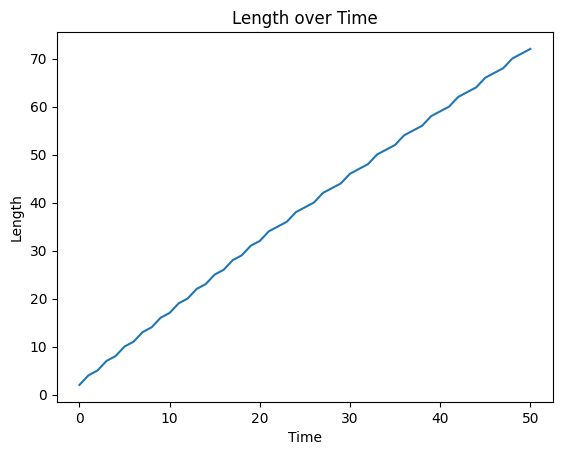

In [3]:
plot_length_single_simulation(df)